In [1]:
import edrixs
import numpy as np
import matplotlib.pyplot as plt
from functions import make_rixs, get_data
from glob import glob

%matplotlib inline

In [2]:
%%capture
eloss = np.arange(-1, 4, 0.02)
filenames = sorted(glob('data/LCO_*.txt'))
thins = [int(filename[9:12])
         for filename in filenames]

filename = filenames[0]



spectra = [get_data(eloss, filename)
           for filename in filenames]

calcs =  [make_rixs(eloss, I0=300, thin=thin) 
           for thin in thins]

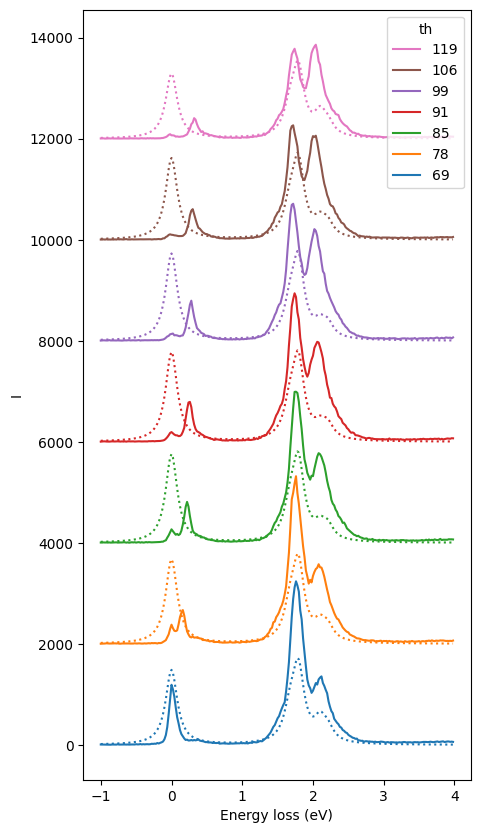

In [3]:
fig, ax = plt.subplots(figsize=(5, 10))

for i, (spectrum, calc, thin) in enumerate(zip(spectra, calcs, thins)):
    ax.plot(eloss, spectrum + 2000*i, color=f'C{i}', label=f'{thin:.0f}')
    ax.plot(eloss, calc + 2000*i, color=f'C{i}', linestyle=':')

ax.set_xlabel('Energy loss (eV)')
ax.set_ylabel('I')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='th')